# The Blueberry Winery - Presentation


# Importing Libraries


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from scipy import stats

import collections
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC



In [49]:
# *data pre-processing* using sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.model_selection import train_test_split

# model selection
from sklearn.ensemble import RandomForestClassifier

# metrics evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline


!pip install imblearn
import imblearn
from imblearn.under_sampling import RandomUnderSampler

from imblearn.under_sampling import TomekLinks, ClusterCentroids


# Dataset

In [50]:
white_wine = pd.read_csv('winequality-white.csv', delimiter = ';')
red_wine = pd.read_csv('winequality-red.csv', delimiter = ';')

# Data Exploration

In [51]:
###create a new variable 'wine_type'

red_wine['wine_type'] = 'red'


###bucket wine quality scores into qualitative quality labels

red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'],
categories=['low', 'medium', 'high'])

In [52]:
###create a new variable 'wine_type' 

white_wine['wine_type'] = 'white'


###create quality groups by label

white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'],
categories=['low', 'medium', 'high'])

# Concatenate red and white wine

In [53]:
wines = pd.concat([red_wine, white_wine])

###re-shuffle records just to randomize data points

wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)

In [54]:
wines.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,high
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red,low
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,medium
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,medium
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,medium
5,7.2,0.53,0.14,2.1,0.064,15.0,29.0,0.99323,3.35,0.61,12.1,6,red,medium
6,7.5,0.27,0.31,17.7,0.051,33.0,173.0,0.99900,3.09,0.64,10.2,5,white,low
7,6.8,0.11,0.27,8.6,0.044,45.0,104.0,0.99454,3.20,0.37,9.9,6,white,medium
8,9.0,0.44,0.49,2.4,0.078,26.0,121.0,0.99780,3.23,0.58,9.2,5,red,low
9,7.1,0.23,0.30,2.6,0.034,62.0,148.0,0.99121,3.03,0.56,11.3,7,white,medium


In [55]:
wines.tail(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
6487,6.1,0.22,0.46,1.80,0.160,34.0,74.0,0.98840,3.19,0.33,13.4,6,white,medium
6488,10.3,0.50,0.42,2.00,0.069,21.0,51.0,0.99820,3.16,0.72,11.5,6,red,medium
6489,6.4,0.31,0.53,8.80,0.057,36.0,221.0,0.99642,3.17,0.44,9.1,5,white,low
6490,5.9,0.26,0.24,2.40,0.046,27.0,132.0,0.99234,3.63,0.73,11.3,5,white,low
6491,8.0,0.34,0.49,9.00,0.033,39.0,180.0,0.99360,3.13,0.38,12.3,8,white,high
6492,7.6,0.32,0.58,16.75,0.050,43.0,163.0,0.99990,3.15,0.54,9.2,5,white,low
6493,5.6,0.28,0.27,3.90,0.043,52.0,158.0,0.99202,3.35,0.44,10.7,7,white,medium
6494,6.4,0.37,0.20,5.60,0.117,61.0,183.0,0.99459,3.24,0.43,9.5,5,white,low
6495,6.5,0.26,0.50,8.00,0.051,46.0,197.0,0.99536,3.18,0.47,9.5,5,white,low
6496,7.2,0.62,0.06,2.70,0.077,15.0,85.0,0.99746,3.51,0.54,9.5,5,red,low


# Machine Learning

# Predictive Modelling

Counter({'white': 3418, 'red': 1129}) Counter({'white': 1480, 'red': 470})
Features: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


# Preprocessing

In [57]:
 # Define the scaler
wtp_ss = StandardScaler().fit(wtp_train_X)
# Scale the train set
wtp_train_SX = wtp_ss.transform(wtp_train_X)
# Scale the test set
wtp_test_SX = wtp_ss.transform(wtp_test_X)

# Modelling

# Model Training - Wine Type Prediction

In [58]:
from sklearn.linear_model import LogisticRegression

wtp_lr = LogisticRegression()
wtp_lr.fit(wtp_train_SX, wtp_train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
verbose=0, warm_start=False)

LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

# Model testing with the dataset

# Logistic Regression

In [59]:
from sklearn.metrics import classification_report

wtp_lr_predictions = wtp_lr.predict(wtp_test_SX)

print(classification_report(wtp_test_y,wtp_lr_predictions, target_names=['red', 'white']))

              precision    recall  f1-score   support

         red       0.99      0.99      0.99       470
       white       1.00      1.00      1.00      1480

    accuracy                           0.99      1950
   macro avg       0.99      0.99      0.99      1950
weighted avg       0.99      0.99      0.99      1950



In [169]:
cohen_kappa_score(wtp_test_y, wtp_lr_predictions)

0.9803766532489937

Wine Type Prediction Model Evaluation - great precision and recall values for the model

# Wine Quality Prediction

In [174]:
wqp_features = wines.iloc[:,:-3]
wqp_class_labels = np.array(wines['quality_label'])
wqp_label_names = ['low', 'medium', 'high']
wqp_feature_names = list(wqp_features.columns)
wqp_train_X, wqp_test_X, wqp_train_y, wqp_test_y = train_test_split(wqp_features,
wqp_class_labels, test_size=0.3, random_state=42)



In [175]:
print(Counter(wqp_train_y), Counter(wqp_test_y))
print('Features:', wqp_feature_names)

Counter({'medium': 2737, 'low': 1666, 'high': 144}) Counter({'medium': 1178, 'low': 718, 'high': 54})
Features: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


# Feature scaling



In [61]:
# Define the scaler
wqp_ss = StandardScaler().fit(wqp_train_X)
# Scale the train set
wqp_train_SX = wqp_ss.transform(wqp_train_X)
# Scale the test set
wqp_test_SX = wqp_ss.transform(wqp_test_X)

# Decision Tree

In [62]:
# train the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
wqp_dt = DecisionTreeClassifier()
wqp_dt.fit(wqp_train_SX, wqp_train_y)

# predict and evaluate performance
wqp_dt_predictions = wqp_dt.predict(wqp_test_SX)

print(classification_report(wqp_test_y,wqp_dt_predictions, target_names=wqp_label_names))

              precision    recall  f1-score   support

         low       0.26      0.31      0.28        54
      medium       0.68      0.68      0.68       718
        high       0.78      0.77      0.77      1178

    accuracy                           0.72      1950
   macro avg       0.57      0.59      0.58      1950
weighted avg       0.73      0.72      0.72      1950



In [204]:
cohen_kappa_score(wqp_test_y,wqp_dt_predictions)

0.4480296602631585

# Feature Importance For Decision Tree

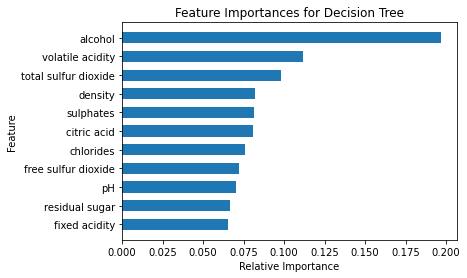

In [63]:
wqp_dt_feature_importances = wqp_dt.feature_importances_
wqp_dt_feature_names, wqp_dt_feature_scores = zip(*sorted(zip(wqp_feature_names,
wqp_dt_feature_importances), key=lambda x: x[1]))
y_position = list(range(len(wqp_dt_feature_names)))
plt.barh(y_position, wqp_dt_feature_scores, height=0.6, align='center')
plt.yticks(y_position , wqp_dt_feature_names)
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
t = plt.title('Feature Importances for Decision Tree')

# Predictive Modelling - RFC

In [76]:
from sklearn.ensemble import RandomForestClassifier
# train the model
wqp_rf = RandomForestClassifier()
wqp_rf.fit(wqp_train_SX, wqp_train_y)
# predict and evaluate performance
wqp_rf_predictions = wqp_rf.predict(wqp_test_SX)

print(classification_report(wqp_test_y,wqp_rf_predictions, target_names=wqp_label_names))

              precision    recall  f1-score   support

         low       0.94      0.28      0.43        54
      medium       0.78      0.72      0.75       718
        high       0.81      0.88      0.84      1178

    accuracy                           0.80      1950
   macro avg       0.84      0.62      0.67      1950
weighted avg       0.80      0.80      0.80      1950



In [77]:
from sklearn.metrics import cohen_kappa_score

In [78]:
cohen_kappa_score(wqp_test_y, wqp_rf_predictions)

0.5889733723728787

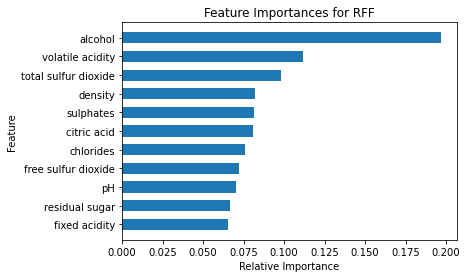

In [207]:
wqp_dt_feature_importances = wqp_dt.feature_importances_
wqp_dt_feature_names, wqp_dt_feature_scores = zip(*sorted(zip(wqp_feature_names,
wqp_dt_feature_importances), key=lambda x: x[1]))
y_position = list(range(len(wqp_dt_feature_names)))
plt.barh(y_position, wqp_dt_feature_scores, height=0.6, align='center')
plt.yticks(y_position , wqp_dt_feature_names)
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
t = plt.title('Feature Importances for RFF')

# 7.SVM

# 7.1 Target and features

In [79]:
from imblearn.under_sampling import RandomUnderSampler

In [121]:
rus = RandomUnderSampler()
X_train, y_train = rus.fit_resample(X_train, y_train)

In [122]:
X_train.shape

(11745, 6)

In [123]:
X_train.head()

,alcohol,sulphates,citric acid,density,volatile acidity,chlorides
0,12.2,0.38,0.74,0.99420,0.17,0.045
1,12.7,0.74,0.09,0.99417,0.57,0.065
2,11.0,0.50,0.36,0.99318,0.17,0.055
3,12.0,0.46,0.32,0.99110,0.35,0.048
4,12.8,0.39,0.48,0.98920,0.66,0.029


In [124]:
y_train.value_counts()

high      3915
medium    3915
low       3915
Name: quality_label, dtype: int64

In [125]:
y = wines['quality_label'] 

In [126]:
X = wines[["alcohol","sulphates", "citric acid","density", "volatile acidity", "chlorides" ]] 


In [127]:
wines.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine_type', 'quality_label'],
      dtype='object')


# 7.2 Split in Training and Test Data

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

# 7.2 SVC

In [129]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [206]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

        high       0.00      0.00      0.00        61
         low       0.60      0.28      0.38       488
      medium       0.67      0.90      0.77       921

    accuracy                           0.66      1470
   macro avg       0.42      0.40      0.38      1470
weighted avg       0.62      0.66      0.61      1470



/Users/charliesmooth/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/charliesmooth/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/charliesmooth/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [177]:
cohen_kappa_score(y_test, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [1950, 4547]

# KNN

In [131]:
from sklearn.neighbors import KNeighborsClassifier
knn =  KNeighborsClassifier(n_neighbors=3)

In [132]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [133]:
y_pred = knn.predict(X_test)

In [134]:
print(confusion_matrix(y_test,y_pred))



[[ 15   1  38]
 [  9 461 248]
 [ 27 256 895]]


In [135]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        high       0.29      0.28      0.29        54
         low       0.64      0.64      0.64       718
      medium       0.76      0.76      0.76      1178

    accuracy                           0.70      1950
   macro avg       0.56      0.56      0.56      1950
weighted avg       0.70      0.70      0.70      1950



In [136]:
from sklearn.metrics import cohen_kappa_score

In [137]:
cohen_kappa_score(y_test, y_pred)

0.4035670289127756

In [183]:
y = white_wine['quality_label'] 

In [215]:
X = white_wine[[ 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides',  
       'pH', 'sulphates', 'alcohol',   ]] 


In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [221]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [222]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

        high       0.00      0.00      0.00        46
         low       0.63      0.29      0.40       502
      medium       0.68      0.91      0.77       922

    accuracy                           0.67      1470
   macro avg       0.44      0.40      0.39      1470
weighted avg       0.64      0.67      0.62      1470



/Users/charliesmooth/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/charliesmooth/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/charliesmooth/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [223]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [220]:
y_pred = knn.predict(X_test)

In [198]:
print(confusion_matrix(y_test,y_pred))

[[ 12   2  47]
 [  3 276 209]
 [ 20 158 743]]


In [199]:
cohen_kappa_score(y_test, y_pred)

0.3709731187092925